# Practical 3: Applications of Matrices in Statistics

In a study on the cost of transporting milk from farms to dairy plants, a survey was taken of firms engaged in milk transportation. Cost data on $X_1$ = fuel, $X_2$ = repair and $X_3$ = capital, all measured on a per-mile basis from 34 firms were taken. The table below shows part of the data collected.

| Fuel ($X_1$) | Repair ($X_2$) | Capital ($X_3$) |
| --- | --- | --- |
| 16.44 | 12.43 | 11.23 |
| 7.19 | 2.7 | 3.92 |
| ⋮ | ⋮ | ⋮ |
| 17.32 | 6.86 | 4.44 |

(a) Plot a scatter matrix to visualise the relationship between $X_1$, $X_2$ and $X_3$. Are the data approximately multivariate normal?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Practical3.csv")
data.head()

,Fuel,Repair,Capital
0,16.44,12.43,11.23
1,7.19,2.70,3.92
2,9.92,1.35,9.75
3,4.24,5.78,7.78
4,11.20,5.05,10.67


<Figure size 432x288 with 0 Axes>

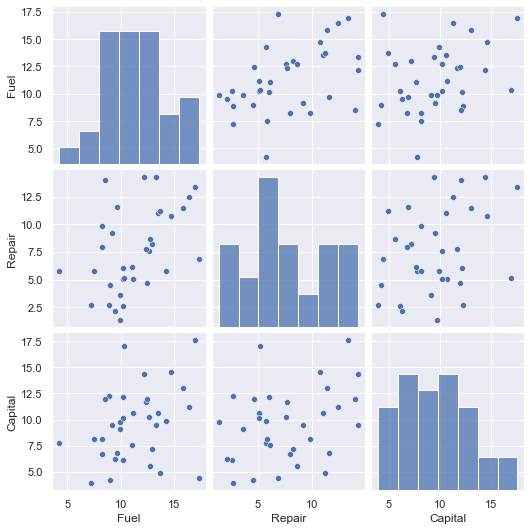

In [3]:
plt.clf()
sm = sns.pairplot(data)
plt.show()

(b) Find the sample mean vector, sample covariance matrix and sample correlation matrix of **<span style='font-family:"Times New Roman"'> <span styel=''><font size="4">X<font>**.

In [4]:
#Find sample mean vector. axis=0 indicates each column in the data matrix is a variable.
x_bar = np.mean(data, axis=0)

In [5]:
x_bar

Fuel       11.311765
Repair      7.632941
Capital     9.561176
dtype: float64

In [6]:
#Find sample covariance matrix. rowvar=0 indicates each column in the data matrix is a variable. 
C = np.cov(data, rowvar=0)

In [7]:
C

array([[ 9.02502103,  5.1557492 ,  3.20167059],
       [ 5.1557492 , 14.25869412,  4.31894492],
       [ 3.20167059,  4.31894492, 11.98734403]])

In [8]:
#Find sample correlation matrix
R = np.corrcoef(data, rowvar=0)

In [9]:
R

array([[1.        , 0.45449362, 0.3078159 ],
       [0.45449362, 1.        , 0.33035152],
       [0.3078159 , 0.33035152, 1.        ]])

(c) Find the generalised sample variance and total sample variance.

In [10]:
#Find generalised sample variance
np.linalg.det(C)

1052.024887663679

In [11]:
np.trace(C)

35.27105918003564

(d) Compute the sample mean and sample variance of a firm’s operational cost of transporting milk per mile, which comprises of fuel cost and repair cost.

Let the operational cost of transporting milk be $Y_1$.<br>
$Y_1 = X_1 + X_2$

In [17]:
#Find the data of operational cost
y1 = data.loc[:,'Fuel'] + data.loc[:,'Repair']
y1

0     28.87
1      9.89
2     11.27
3     10.02
4     16.25
5     20.03
6     24.48
7     27.59
8     20.29
9     13.31
10    13.53
11    15.32
12    17.26
13    26.43
14    12.83
15    16.23
16    11.58
17    20.07
18    22.53
19    21.19
20    30.30
21    25.48
22    15.48
23    13.47
24    21.29
25    21.35
26    11.65
27    16.17
28    24.92
29    18.06
30    27.28
31    18.36
32    17.16
33    24.18
dtype: float64

In [13]:
#Find sample mean of operational cost
y1_bar = np.mean(y1, axis=0)
y1_bar

18.94470588235294

In [14]:
#Find sample variance of operational cost
y1_C = np.cov(y1, rowvar=0)
y1_C

array(33.59521355)

(e) Compute the sample mean and sample variance of a firm’s total cost of ownership of the trucks per mile for transporting milk, which comprises of fuel cost, repair cost and capital cost.

In [22]:
z1 = data.loc[:,'Fuel'] + data.loc[:,'Repair'] + data.loc[:,'Capital']
display(z1)
z1_bar = np.mean(z1, axis=0)
z1_C = np.cov(z1, rowvar=0)
print("Sample mean:", z1_bar)
print("Sample variance:", z1_C)

0     40.10
1     13.81
2     21.02
3     17.80
4     26.92
5     29.91
6     35.08
7     37.04
8     30.52
9     21.44
10    22.66
11    25.49
12    24.87
13    40.82
14    18.92
15    28.37
16    23.81
17    31.75
18    34.54
19    28.37
20    47.89
21    40.06
22    32.48
23    17.73
24    28.12
25    26.94
26    17.88
27    22.89
28    29.83
29    26.23
30    40.34
31    27.85
32    29.10
33    28.62
dtype: float64

Sample mean: 28.505882352941182
Sample variance: 60.62378859180035


(f) Determine the sample covariance matrix for the variables in parts (d) and (e).

In [16]:
y1z1 = pd.DataFrame([y1,z1])
y1z1_C = np.cov(y1z1.T, rowvar=0)
y1z1_C

array([[33.59521355, 41.11582906],
       [41.11582906, 60.62378859]])